In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [2]:
sample_submission_path = "/kaggle/input/playground-series-s4e6/sample_submission.csv"
train_path = "/kaggle/input/playground-series-s4e6/train.csv"
test_path ="/kaggle/input/playground-series-s4e6/test.csv"
submission_path='/kaggle/input/playground-series-s4e6/sample_submission.csv'

In [3]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
submit = pd.read_csv(submission_path)

In [4]:
train_df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [5]:
len(train_df.columns)

38

**Types of variable**

In [6]:
print( "total unique id =",train_df.groupby(by='id')['id'].count())
print("len(train_df) = ",len(train_df))

total unique id = id
0        1
1        1
2        1
3        1
4        1
        ..
76513    1
76514    1
76515    1
76516    1
76517    1
Name: id, Length: 76518, dtype: int64
len(train_df) =  76518


## NUMBER OF VALUES PER COLUMSN
- considering id column as unique

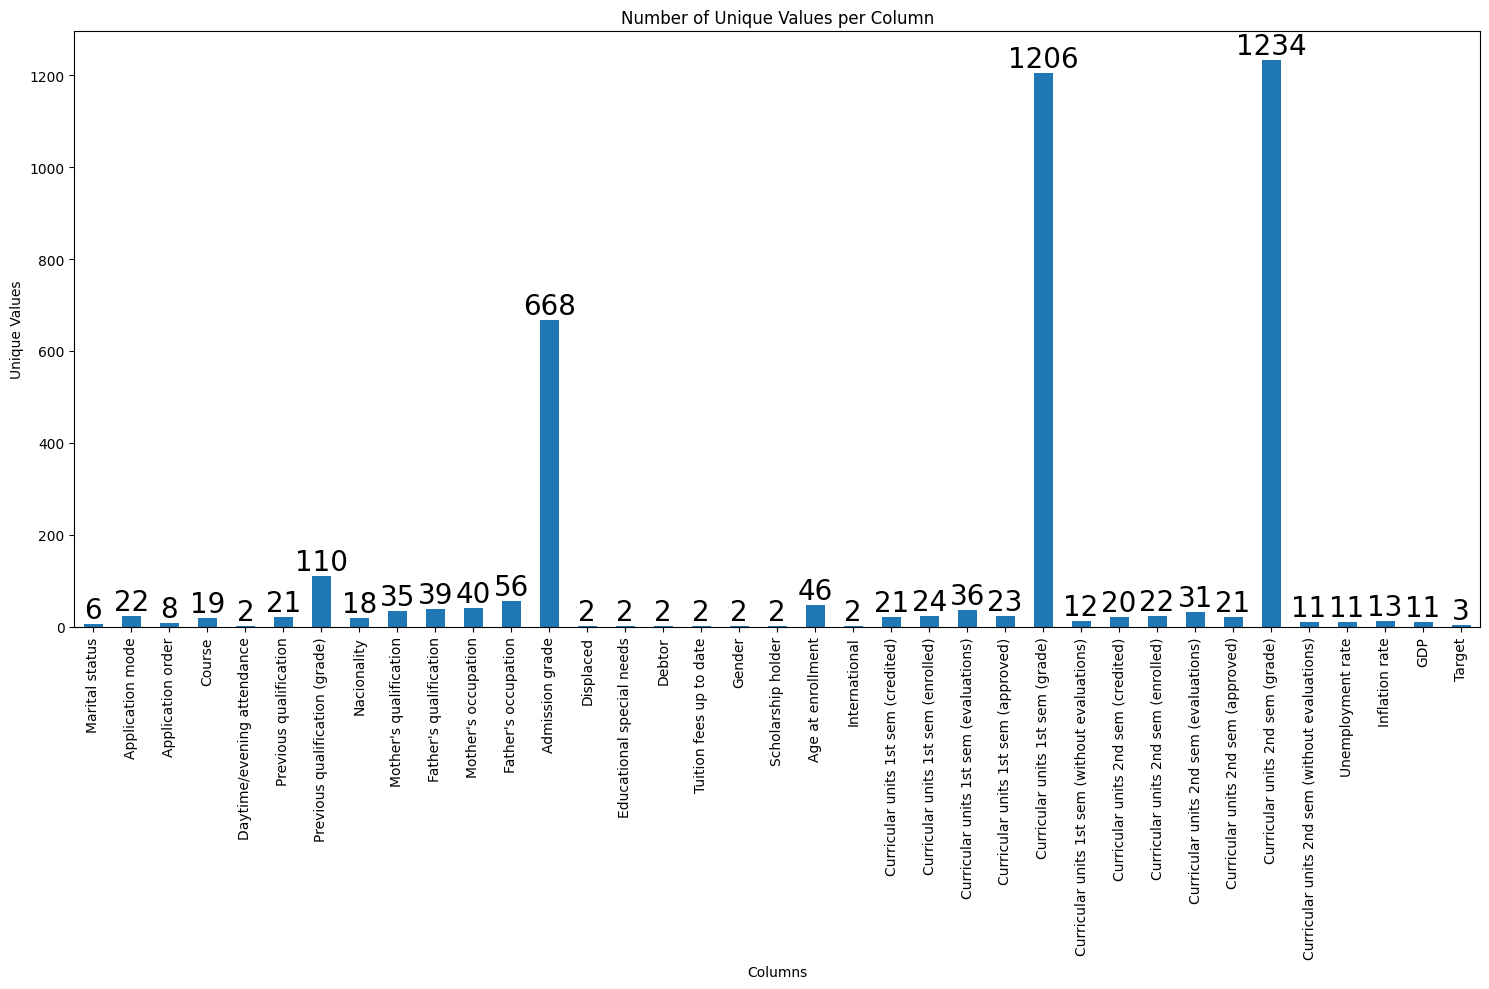

In [7]:
df = train_df.copy()


unique_counts = df[df.columns[1:]].nunique()
plt.figure(figsize=(15, 10))
ax = unique_counts.plot(kind='bar')
plt.title('Number of Unique Values per Column')
plt.xlabel('Columns')
plt.ylabel('Unique Values')
plt.xticks(rotation=90)
# plt.yticks(range(0, unique_counts.max() + 100))

for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=20)
    
plt.tight_layout()
plt.show()


In [8]:
df.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

## CHECK TARGET

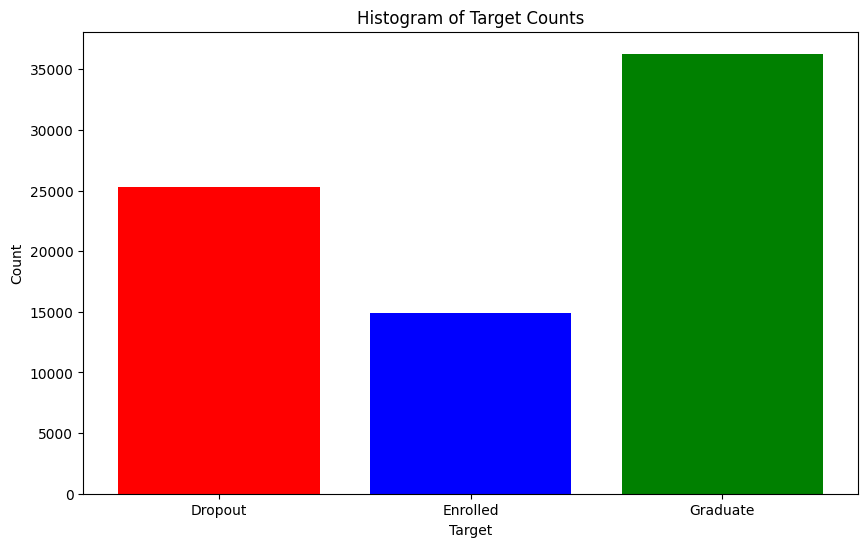

In [9]:
target_counts = df.groupby(by='Target')['id'].count()

# Create lists of targets and their counts
targets = target_counts.index.tolist()
counts = target_counts.values

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(targets, counts, color=['red', 'blue', 'green'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Histogram of Target Counts')
plt.show()

## DATA TYPES

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

### ONE STR ( OBJECT ) TYPE OF DATA

## Change Data types

In [11]:
def cahnge_target_to_number(target: str) -> int:
    if target == 'Dropout':
        return 0
    elif target == 'Graduate':
        return 1
    else:
        return 2

    
def inverse_cahnge_target_to_number(target: str) -> int:
    if target == 0:
        return 'Dropout'
    elif target == 1:
        return 'Graduate'
    else:
        return 'Enrolled Target'
    

In [12]:
df_corr = df.copy()
df_corr['Target'] = df_corr['Target'].apply(cahnge_target_to_number)

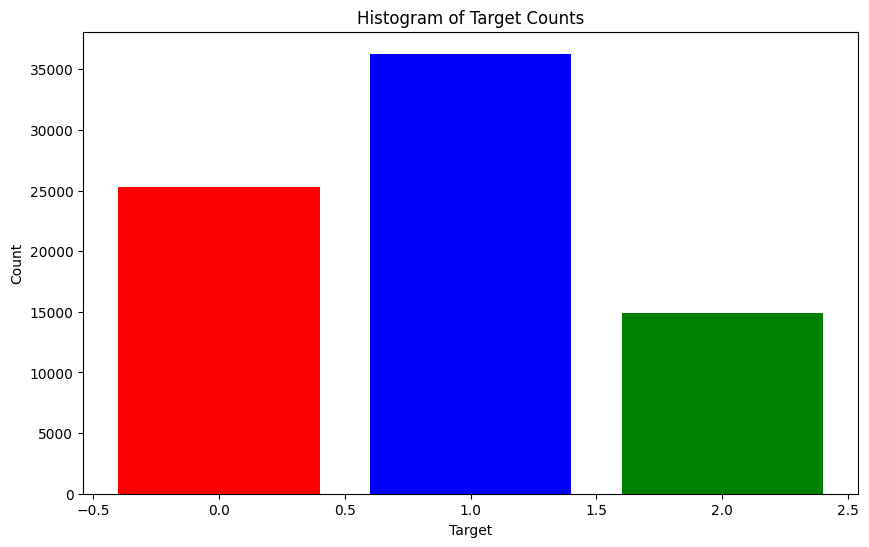

In [13]:
target_counts = df_corr.groupby(by='Target')['id'].count()

# Create lists of targets and their counts
targets = target_counts.index.tolist()
counts = target_counts.values

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(targets, counts, color=['red', 'blue', 'green'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Histogram of Target Counts')
plt.show()

## CHECK CORRELATION

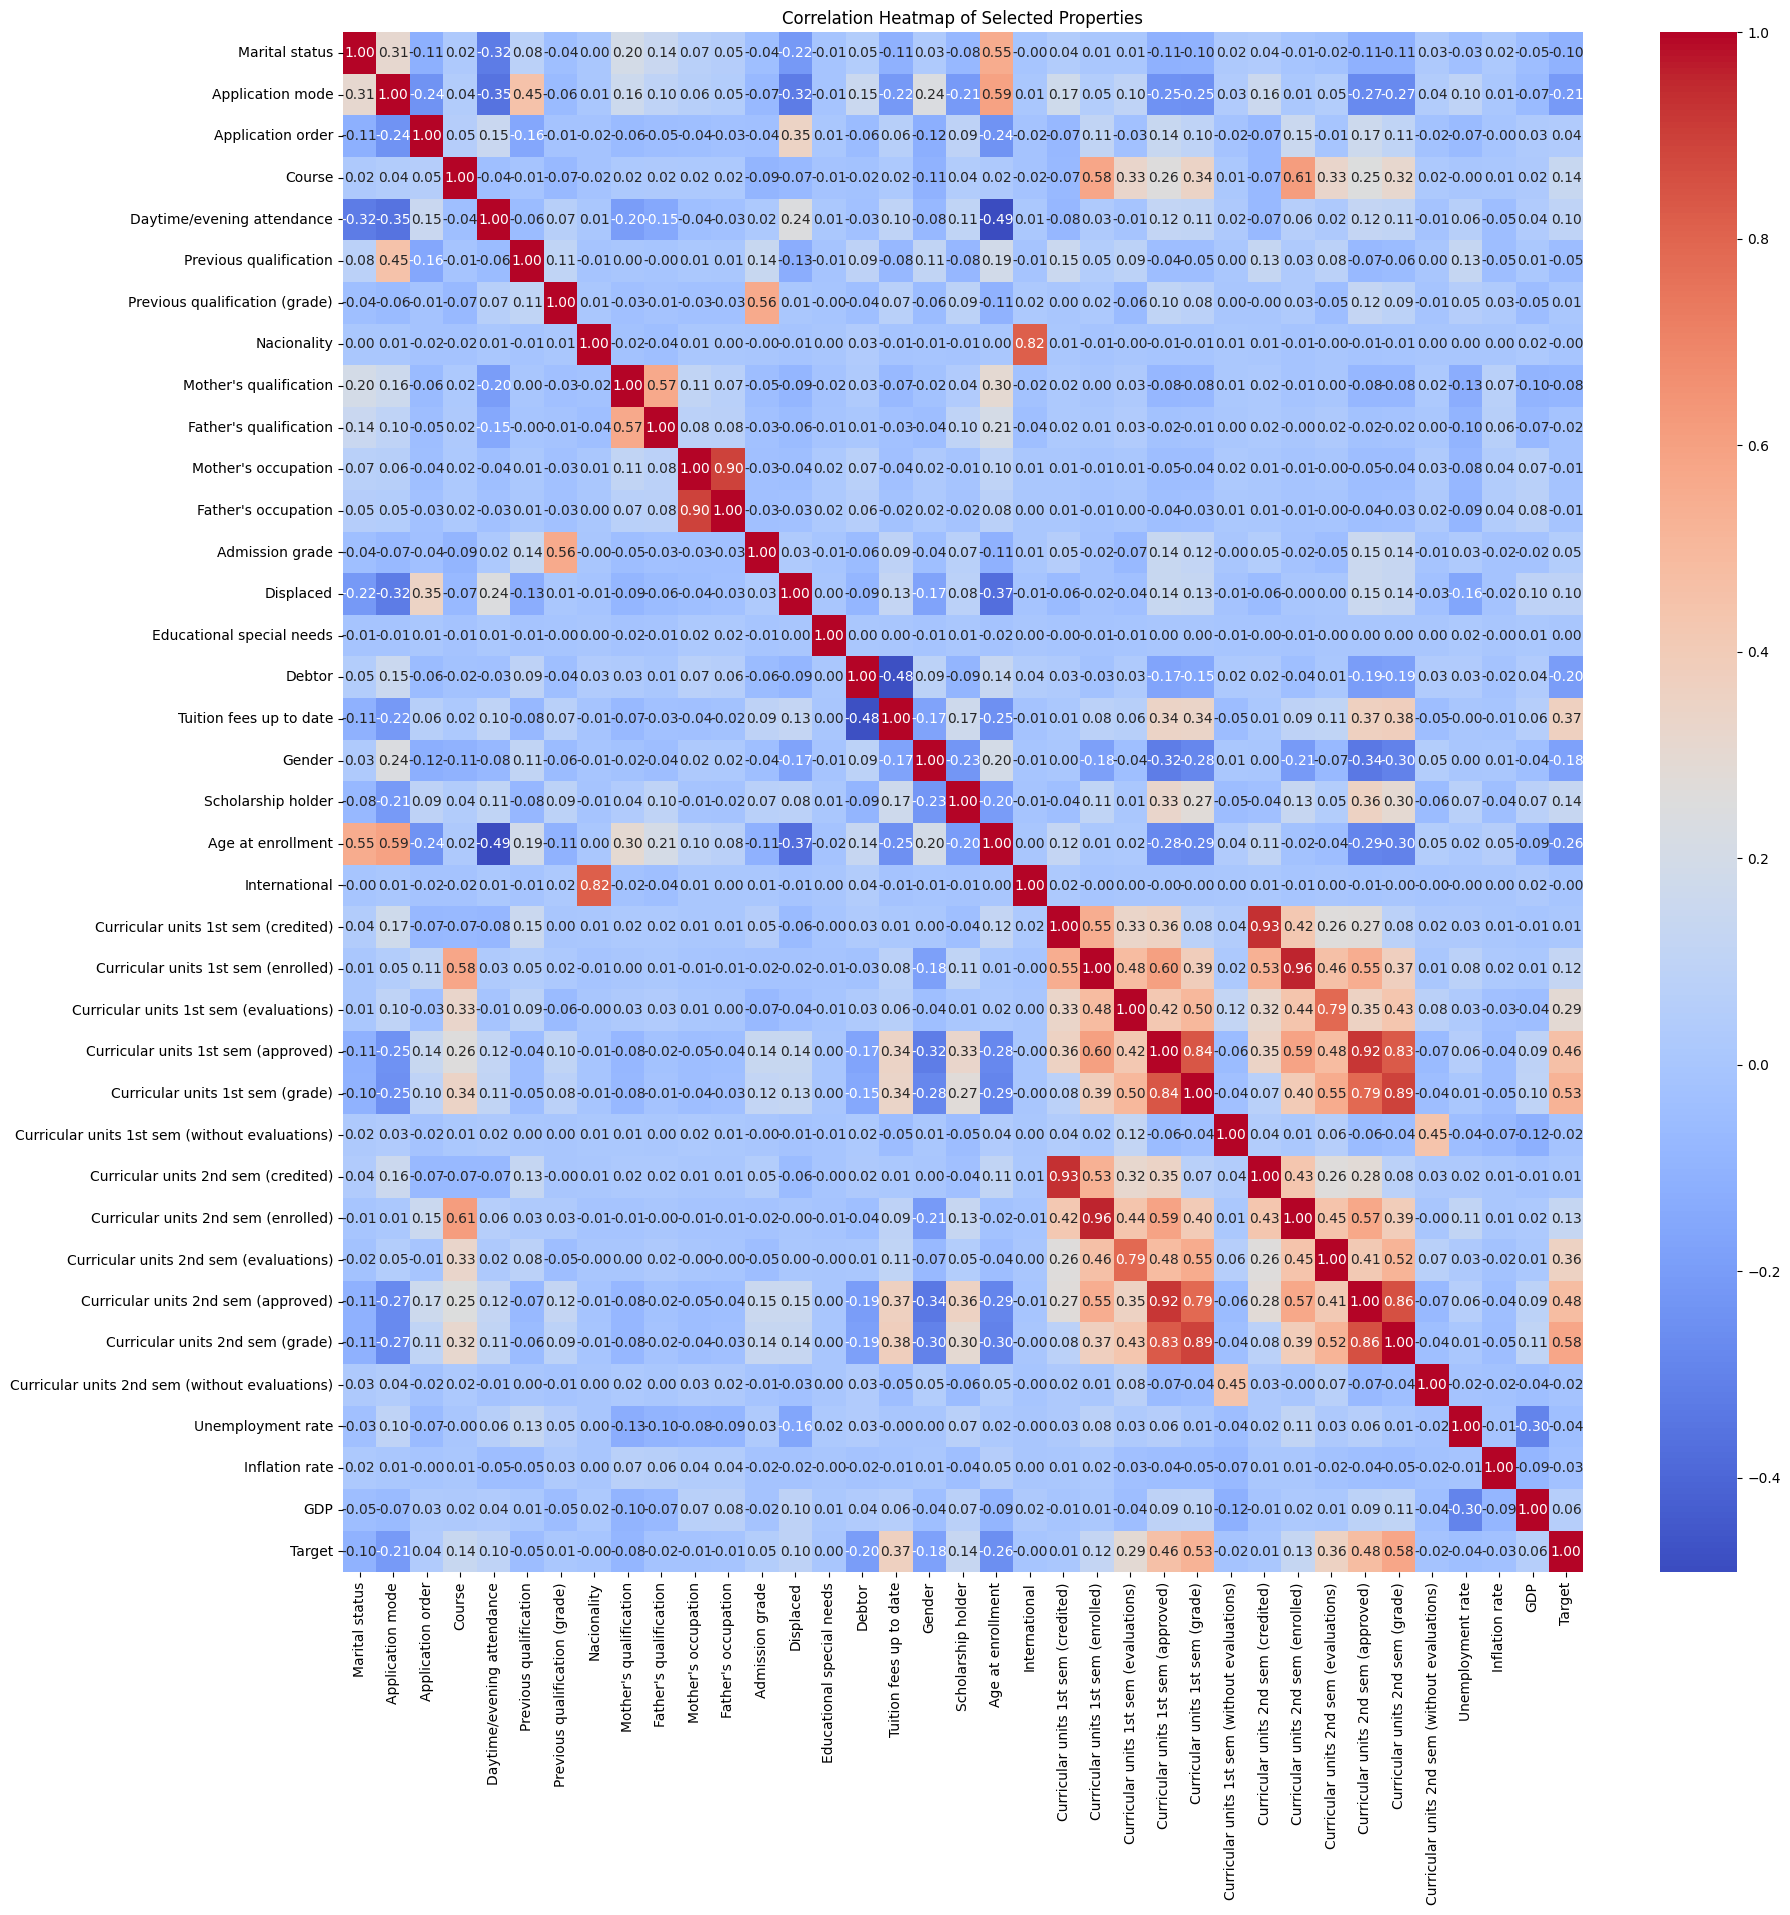

In [14]:
properties = df_corr.columns[1:]
df_subset = df_corr[properties]

corr = df_subset.corr()

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Selected Properties')
plt.show()


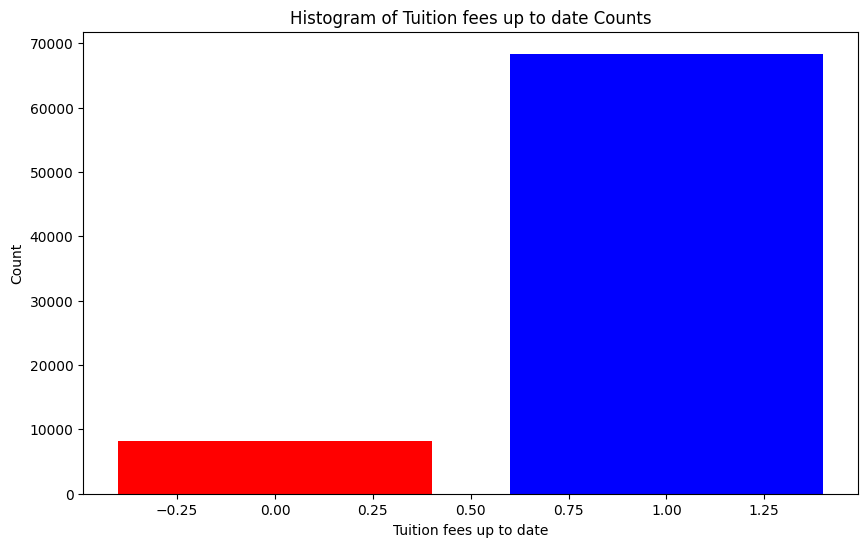

In [15]:
target_counts = df_corr.groupby(by='Tuition fees up to date')['id'].count()

# Create lists of targets and their counts
targets = target_counts.index.tolist()
counts = target_counts.values

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(targets, counts, color=['red', 'blue', 'green'])
plt.xlabel('Tuition fees up to date')
plt.ylabel('Count')
plt.title('Histogram of Tuition fees up to date Counts')
plt.show()

In [16]:
df_corr.groupby(by=['Tuition fees up to date','Target'])['id'].count()

Tuition fees up to date  Target
0                        0          7645
                         1           130
                         2           363
1                        0         17651
                         1         36152
                         2         14577
Name: id, dtype: int64

## TRAIN, TEST AND SUBMIT

In [17]:
train_df = df.copy()


x = train_df.drop(columns = ['id','Target'] , axis = 1)
y = train_df['Target'].apply(cahnge_target_to_number)



# from sklearn.model_selection import train_test_split
# x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 42)



In [18]:

# xgb_classifier = XGBClassifier()
# xgb_classifier.fit(x_train , y_train)

In [19]:
# y_pred = xgb_classifier.predict(x_test)

In [20]:
# accuracy_score(y_pred , y_test)

## TRY NN

In [21]:


import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Encode labels to integers
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.25, random_state=42)

# Build a neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(set(y_encoded)), activation='softmax')  # Output layer size based on number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=200, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Accuracy:", accuracy)


2024-06-16 13:10:41.117930: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-16 13:10:41.118142: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-16 13:10:41.284931: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/200


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1794/1794 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.4770 - loss: 40.1596
Epoch 2/200
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6278 - loss: 7.4374
Epoch 3/200
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6748 - loss: 5.7463
Epoch 4/200
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7084 - loss: 3.7668
Epoch 5/200
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7079 - loss: 2.6365
Epoch 6/200
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7163 - loss: 1.8093
Epoch 7/200
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7195 - loss: 1.4195
Epoch 8/200
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7260 - loss: 1.0763
Epoch 9/200
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7374 - loss: 0.8380
Epoch 10/200
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7590 - loss: 0.6349
Epoch 11/200
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7633 - loss: 0.5876
Epoch 12/200
1794/1794 ━━━━━━━

In [22]:
# test = test_df.drop(columns = ['id'], axis = 1)
# pred = xgb_classifier.predict(test)
# pred = pd.DataFrame(pred)
# submit['Target'] = pred[pred.columns[0]].apply(inverse_cahnge_target_to_number).values
# submit.to_csv('/kaggle/working/submission.csv', index=False)

In [23]:
test = test_df.drop(columns = ['id'], axis = 1)
pred = model.predict(test)
pred = pd.DataFrame(pred)
submit['Target'] = pred[pred.columns[0]].apply(inverse_cahnge_target_to_number).values
submit.to_csv('/kaggle/working/submission.csv', index=False)

1595/1595 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
